# IE582 HW3-Yasemin Aylin Akturk

For the codes and R-files please check: https://github.com/BU-IE-582/fall21-yaseminaylinakturk/tree/gh-pages/HW3

# Task 1 – On the use of distance information for UwaveGesture Recognition Task

In [3]:
klasor =  "C:/Users/y.akturk/Documents/"
setwd(klasor)
library("caret")
library("kknn")
library("class")

In [4]:
x_acc <- read.csv2("uWaveGestureLibrary_X_TRAIN.csv", header = F, fileEncoding = 'UTF-8-BOM')
y_acc <- read.csv2("uWaveGestureLibrary_Y_TRAIN.csv", header = F, fileEncoding = 'UTF-8-BOM')
z_acc <- read.csv2("uWaveGestureLibrary_Z_TRAIN.csv", header = F, fileEncoding = 'UTF-8-BOM')

test_x_acc <- read.csv2("uWaveGestureLibrary_X_TEST.csv", header = F, fileEncoding = 'UTF-8-BOM')
test_y_acc <- read.csv2("uWaveGestureLibrary_Y_TEST.csv", header = F, fileEncoding = 'UTF-8-BOM')
test_z_acc <- read.csv2("uWaveGestureLibrary_Z_TEST.csv", header = F, fileEncoding = 'UTF-8-BOM')


In [5]:
#rename col names

colnames (x_acc)[1] = c("Ges_Class")
colnames (y_acc)[1] = c("Ges_Class")
colnames (z_acc)[1] = c("Ges_Class")


colnames (test_x_acc)[1] = c("Ges_Class")
colnames (test_y_acc)[1] = c("Ges_Class")
colnames (test_z_acc)[1] = c("Ges_Class")


In [6]:
#sample data

x_acc[1:8,1:3]
y_acc[1:8,1:3]
z_acc[1:8,1:3]

Ges_Class,V2,V3
6,-0.30,-0.30
5,1.63,1.63
5,0.66,0.66
3,0.01,0.01
4,1.29,1.29
8,-0.48,-0.48
7,1.47,1.47
4,0.31,0.31


Ges_Class,V2,V3
6,-2.12,-2.12
5,0.67,0.67
5,-0.19,-0.19
3,0.37,0.37
4,-0.40,-0.40
8,-1.08,-1.08
7,1.26,1.26
4,-0.33,-0.33


Ges_Class,V2,V3
6,-1.53,-1.53
5,1.79,1.79
5,0.52,0.52
3,0.31,0.31
4,-0.47,-0.47
8,0.66,0.66
7,1.24,1.24
4,-1.30,-1.30


In [7]:
#concatenate train set and test set

cop_x_acc = x_acc
cop_y_acc = y_acc[,-1]
cop_z_acc = z_acc[,-1]

test_cop_x_acc = test_x_acc
test_cop_y_acc = test_y_acc[,-1]
test_cop_z_acc = test_z_acc[,-1]

#rename columns

colnames(cop_x_acc)[2:316] <-paste("X.", 1:315)
colnames(cop_y_acc)[1:315] <-paste("Y.", 1:315)
colnames(cop_z_acc)[1:315] <-paste("Z.", 1:315)

colnames(test_cop_x_acc)[2:316] <-paste("X.", 1:315)
colnames(test_cop_y_acc)[1:315] <-paste("Y.", 1:315)
colnames(test_cop_z_acc)[1:315] <-paste("Z.", 1:315)

In [8]:
#combine data
train_Data_Conc <-as.data.frame(cbind(cop_x_acc[,],cop_y_acc[,],cop_z_acc[,]))
test_Data_Conc <-as.data.frame(cbind(test_cop_x_acc[,],test_cop_y_acc[,],test_cop_z_acc[,]))


In [9]:
#sample train
train_Data_Conc[1:3, c(1,2,320,850)]
train_Data_Conc[,1] = as.factor(train_Data_Conc[,1])
train_Data_Conc[1:3, c(1,2,320,850)]

Ges_Class,X. 1,Y. 4,Z. 219
6,-0.30,-2.12,0.75
5,1.63,0.67,-0.69
5,0.66,-0.19,-1.44


Ges_Class,X. 1,Y. 4,Z. 219
6,-0.30,-2.12,0.75
5,1.63,0.67,-0.69
5,0.66,-0.19,-1.44


In [10]:
#sample test
test_Data_Conc[1:3, c(1,2,320,850)]
test_Data_Conc[,1] = as.factor (test_Data_Conc[,1])
test_Data_Conc[1:3, c(1,2,320,850)]

Ges_Class,X. 1,Y. 4,Z. 219
5,1.56,1.17,-1.16
1,-0.08,-1.11,-0.70
4,1.51,-0.89,0.50


Ges_Class,X. 1,Y. 4,Z. 219
5,1.56,1.17,-1.16
1,-0.08,-1.11,-0.70
4,1.51,-0.89,0.50


In [9]:
#show dimension
dim(train_Data_Conc)
dim(test_Data_Conc)

[1] 896 946

[1] 3582  946

In [11]:
#scale
#doing something distance based then scaled data should be used
Scaled_Train_Data_Conc <- train_Data_Conc
Scaled_Train_Data_Conc[,-1] <- scale(train_Data_Conc[,-1])

In [12]:
Scaled_Test_Data_Conc <- test_Data_Conc
Scaled_Test_Data_Conc[,-1] <- scale(test_Data_Conc[,-1])

In the first column we have the class ID, the stadandardized x1-x2---y1-y2--z1-z2-- in the rest of the columns



### 1a)Suppose we decided to apply a nearest-neighbor (NN) classifier to find the labels of test instances. You can use the strategy you employed when you apply PCA to this data in Homework 2 (i.e. concatenation of the axes). Propose two distance measures for computing similarity between two time series. The distance calculation on the concatenated time series implicitly weights the distances of each axis in an equal way. For each distance measure alternative, use the training data to identify the ideal value of k which minimizes the error of a10-fold cross-validation.

### Train

In [12]:
#train with 10 fold cross - validation

trControl <- caret:::trainControl(method  = "cv", number  = 10)


Training the models from now on.

Kernel is selected as "rectangular" (which is standard unweighted knn)

Trying k: 1 to 5

Try distance euclidean  (minkowski parameter = 2)

Try distance manhattan  (minkowski parameter = 1)

Using the Manhattan metric, a distance between two time series is the ~ area between them.

#### For Manhattan distance

In [19]:
fit1 <- caret:::train(Ges_Class ~ .,
             method     = "kknn",
             tuneGrid   = expand.grid(kmax = 1:5, distance = 1 , kernel= "rectangular"),
             trControl  = trControl,
             metric     = "Accuracy",
             data       = Scaled_Train_Data_Conc)

#trconrol -> 10 fold cv is done

The results are below for Manhattan distance:

In [38]:
k-Nearest Neighbors 

896 samples
945 predictors
  8 classes: '1', '2', '3', '4', '5', '6', '7', '8' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 805, 806, 806, 805, 808, 805, ... 
Resampling results across tuning parameters:

  kmax  Accuracy   Kappa    
  1     0.9576593  0.9515512
  2     0.9576593  0.9515512
  3     0.9587829  0.9528373
  4     0.9587829  0.9528373
  5     0.9587829  0.9528373

Tuning parameter 'distance' was held constant at a value of 1
Tuning parameter 'kernel' was held constant at a value of rectangular
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were kmax = 5, distance = 1 and kernel = rectangular.



Best K=3, when dist=1, Manhattan

When distance was manhattan, the k value is selected as 3. Although it is given as 5 above output (last line), overcomplicating the model was the same level of accuracy is not reasonable. Over 95 % accuracy is noted.

#### For Euclidean distance

In [15]:
fit2 <- train(Ges_Class ~ .,
              method     = "kknn",
              tuneGrid   = expand.grid(kmax = 1:5, distance = 2 , kernel= "rectangular"),
              trControl  = trControl,
              metric     = "Accuracy",
              data       = Scaled_Train_Data_Conc)



The results are below for Euclidean distance:

In [39]:
k-Nearest Neighbors 

896 samples
945 predictors
  8 classes: '1', '2', '3', '4', '5', '6', '7', '8' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 807, 807, 807, 806, 804, 805, ... 
Resampling results across tuning parameters:

  kmax  Accuracy   Kappa    
  1     0.9497179  0.9424687
  2     0.9497179  0.9424687
  3     0.9442490  0.9361971
  4     0.9442490  0.9361971
  5     0.9442490  0.9361971

Tuning parameter 'distance' was held constant at a value of 2
Tuning parameter 'kernel' was held constant at a value of rectangular
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were kmax = 2, distance = 2 and kernel = rectangular.

When distance was euclidean, the k value is selected as 2, as suggested by the output. Almost 95% acurracy is noted.

### 1b) Using the value of k (identified for each distance measure) in part (a) and evaluate your final performance on the test data and present your results in a (8-by-8) confusion matrix, showing the counts for actual and predicted labels. In addition, quote the runtime and accuracy for your results.

### Test

#### For Manhattan distance, with K = 3, train on the training data and test it on the test data. The confusion matrix printed out.  The misclassification error and the accuracy is also printed.

In [28]:
library("kknn")
####manhattan
start.time <- Sys.time()

Gesture.kknn1 <- kknn(Ges_Class ~ ., Scaled_Train_Data_Conc, Scaled_Test_Data_Conc,distance = 1, k=3, kernel ="rectangular")

table(Scaled_Test_Data_Conc$Ges_Class, Gesture.kknn1$fit)

error_man = 1 - sum (Scaled_Test_Data_Conc$Ges_Class ==  Gesture.kknn1$fit)/nrow(Scaled_Test_Data_Conc)
error_man
acc_man= 1- error_man
acc_man
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken


   
      1   2   3   4   5   6   7   8
  1 432   0   0   2   0   3   0   0
  2   1 451   0   0   0   0   0   0
  3   2   0 415   0  12  20   5   0
  4   3   0   0 384  48   8   0   7
  5   3   0   4   2 422   2   0   0
  6   6   0   4  12  27 400   0   0
  7   1   0   2   0   0   0 444   0
  8   0   0   0   1   1   0   0 458

[1] 0.04913456

[1] 0.9508654

Time difference of 26.51121 secs

To interpret the confusion matrix:

For instance 432 of the class1 test instances were classified correctly,
whereas 2 of those were misclassified as class4 and 3 of them are misclassified as class6.

The accuracy is over 95 %.

Less than 5 % misclassification is observed.

It took less then 30 seconds to obtain the results.

#### For Euclidean distance, with K = 2, train on the training data and test it on the test data. The confusion matrix printed out. The misclassification error and the accuracy is also printed.

In [27]:
####euclidean
start.time <- Sys.time()

Gesture.kknn2 <- kknn(Ges_Class ~ ., Scaled_Train_Data_Conc, Scaled_Test_Data_Conc,distance = 2, k=2, kernel ="rectangular")

table(Scaled_Test_Data_Conc$Ges_Class, Gesture.kknn2$fit)

error_euc = 1 - sum (Scaled_Test_Data_Conc$Ges_Class ==  Gesture.kknn2$fit)/nrow(Scaled_Test_Data_Conc)
error_euc
end.time <- Sys.time()

acc_euc= 1- error_euc
acc_euc

time.taken <- end.time - start.time
time.taken


   
      1   2   3   4   5   6   7   8
  1 429   0   0   2   0   5   1   0
  2   1 450   0   0   0   0   1   0
  3   2   0 416   1  14  15   6   0
  4   6   0   0 380  51  10   0   3
  5   2   0   9   3 416   3   0   0
  6   7   0   3  12  19 407   1   0
  7   0   0   3   0   0   0 444   0
  8   0   0   0   4   2   0   0 454

[1] 0.0519263

[1] 0.9480737

Time difference of 4.274762 secs

To interpret the confusion matrix:

For instance 450 of the class2 test instances were classified correctly, whereas 1 of them was misclassified as class1 and 1 of them are misclassified as class7.

The accuracy is about 95 %.

About 5 % misclassification is observed.

It took about 4 seconds to obtain the results, it was much faster then the first model.

#### These parts below are just for re-checking the steps done so far. The same process was performed in a different manner. Further, if we were to compare Manhattan distance with 5 different k values vs Euclidean distance with 5 different k values:

In [25]:
###overall
fit <- train(Ges_Class ~ .,
             method     = "kknn",
             tuneGrid   = expand.grid(kmax = 1:5, distance = 1:2 , kernel= "rectangular"),
             trControl  = trControl,
             metric     = "Accuracy",
             data       = Scaled_Train_Data_Conc)

###overall end

The below result were obtained comparing  5 different levels of k across 2 different distance measures (dist = 1 Manhattan and dist = 2, Euclidean).

The results suggest k = 5 and distance = 1 with the highest accuracy, however it is clear that we can get the same level of accuracy with  k=3 with distance = 1, which was implemented above. And, we got a little bit higher accuracy with this model (manhattan, K =3), than the other (Euclidean K =2) which confirms our results.

In [40]:
k-Nearest Neighbors 

896 samples
945 predictors
  8 classes: '1', '2', '3', '4', '5', '6', '7', '8' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 805, 807, 806, 806, 806, 807, ... 
Resampling results across tuning parameters:

  kmax  distance  Accuracy   Kappa    
  1     1         0.9586736  0.9527245
  1     2         0.9398066  0.9311277
  2     1         0.9586736  0.9527245
  2     2         0.9398066  0.9311277
  3     1         0.9586736  0.9527245
  3     2         0.9442019  0.9361512
  4     1         0.9586736  0.9527245
  4     2         0.9419545  0.9335789
  5     1         0.9586736  0.9527245
  5     2         0.9419545  0.9335789

Tuning parameter 'kernel' was held constant at a value of rectangular
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were kmax = 5, distance = 1 and kernel = rectangular.

In [29]:
#####try in another way,with a different fucntion.It has the same results in terms of misclassification error (~accuracy)
#we get similar accuracy
#train with possible K = 1:5 values in manhattan distance
#test on test data
#print confusion matrix 
(fit.train1 <- train.kknn(Ges_Class ~ ., Scaled_Train_Data_Conc, kmax = 5, distance = 1, kernel ="rectangular"))

table(predict(fit.train1, Scaled_Test_Data_Conc), Scaled_Test_Data_Conc$Ges_Class)
###
#we get similar accuracy for K=1 and K = 3


Call:
train.kknn(formula = Ges_Class ~ ., data = Scaled_Train_Data_Conc,     kmax = 5, distance = 1, kernel = "rectangular")

Type of response variable: nominal
Minimal misclassification: 0.0390625
Best kernel: rectangular
Best k: 1

   
      1   2   3   4   5   6   7   8
  1 433   1   2   4   3   6   0   0
  2   0 451   0   0   0   0   0   0
  3   0   0 415   0   9   5   3   0
  4   1   0   0 396   4  11   0   3
  5   0   0  16  39 414  17   0   1
  6   3   0  16   8   3 410   0   0
  7   0   0   5   0   0   0 444   0
  8   0   0   0   3   0   0   0 456

In [30]:
#####try in another way,with a different fucntion. It has the same results in terms of misclassification error (~accuracy)

#train with possible K = 1:5 values in eucl. distance
#test on test data
#print confusion matrix 

(fit.train2 <- train.kknn(Ges_Class ~ ., Scaled_Train_Data_Conc, kmax = 5, distance = 2,kernel ="rectangular"))

table(predict(fit.train2, Scaled_Test_Data_Conc), Scaled_Test_Data_Conc$Ges_Class)

#we get similar accuracy for K=2 and K = 3


Call:
train.kknn(formula = Ges_Class ~ ., data = Scaled_Train_Data_Conc,     kmax = 5, distance = 2, kernel = "rectangular")

Type of response variable: nominal
Minimal misclassification: 0.05245536
Best kernel: rectangular
Best k: 3

   
      1   2   3   4   5   6   7   8
  1 429   1   1   5   3   5   0   0
  2   0 449   0   0   0   0   0   0
  3   0   0 414   0   5   5   2   0
  4   3   0   0 372   1  14   0   1
  5   0   0  14  59 422  29   0   1
  6   4   0  21   8   2 395   0   0
  7   1   2   4   0   0   1 445   0
  8   0   0   0   6   0   0   0 458

#### Overall results:
For Manhattan distance, with K = 3

The accuracy is over 95 %.
Less than 5 % misclassification is observed.
It took less than 30 seconds to obtain the results.

For Euclidean distance, with K = 2

About 5 % misclassification is observed.
It took about 4 seconds to obtain the results, it was much faster then the first model.

### 1c)The observations from different axes are weighted equally if we compute the distance over each axis and sum them to obtain a final similarity measure. Is this reasonable? For example, we can ompute the distance as below:(w.distx+w*disty+w*distz) where DistX is the distance based on the acceleration only on X axis, DistY is for Y axis and so on. Do you think weighting the distances over different axes to obtain a final similarity measure makes sense for classification? Why?

Yes, weighting some distances more than the others make sense in this setting.
We may interpret this kind of unequal weights as eliminating the noise in the z-axis.
Since the actual data could be presented in a 2D figure schematically, we may infer that the z axis do not provide as much as the x and y axes (assuming the motion takes place mostly on xy plane). A similarity heavily based on these two axes may be a more accurate metric compared to computing a distance where the observations from different axes are weighted equally.

## Task 2 – Linear models on alternative representations of the data

### 2a) Train a logistic regression model on the training data and use the model to make a prediction on the test data. Note that you will obtain probabilistic predictions (i.e. probability of a time series being from Class 3 if you encoded Class 3 as 1 in binary classification setting). This will require you to select a threshold since 0.5 as a threshold may not work well under this imbalanced class setting. To make things easier, use the ratio of Class 3 instances in the training data as threshold. Use the learned model to predict the class for test data. Present your results in a (2-by-2) confusion matrix.

In [13]:
#install.packages("glmnet")
library("glmnet")

#make the class info binary
#put 1 if class3 else put 0
#transform both training and test data

#training
c_train=Scaled_Train_Data_Conc
c_train[1:10,1:2] #now we have 1,2,3,4,5,6

c_train$Ges_Class=ifelse(c_train$Ges_Class==3,1,0)
c_train[1:10,1:2] #now we have 0-1

#for test set
c_test=Scaled_Test_Data_Conc
c_test[10:20,1:2]
c_test$Ges_Class=ifelse(c_test$Ges_Class==3,1,0)
c_test[10:20,1:2]

Ges_Class,X. 1
6,-0.42019517
5,1.78273070
5,0.67556070
3,-0.06635733
4,1.39465049
8,-0.62564939
7,1.60010472
4,0.27606638
4,1.04081266
6,-1.42463805


Ges_Class,X. 1
0,-0.42019517
0,1.78273070
0,0.67556070
1,-0.06635733
0,1.39465049
0,-0.62564939
0,1.60010472
0,0.27606638
0,1.04081266
0,-1.42463805


,Ges_Class,X. 1
10,1,-0.074001045
11,2,-0.918031281
12,4,0.145678058
13,3,0.006933361
14,4,0.596598321
15,4,1.879986763
16,1,-1.738937402
17,5,0.099429826
18,6,-1.623316822
19,4,0.319108928


,Ges_Class,X. 1
10,0,-0.074001045
11,0,-0.918031281
12,0,0.145678058
13,1,0.006933361
14,0,0.596598321
15,0,1.879986763
16,0,-1.738937402
17,0,0.099429826
18,0,-1.623316822
19,0,0.319108928


#### Perform logistic regression. Create the model using training data

In [14]:
##logistic regression

log_reg=glm(Ges_Class~.,c_train,family='binomial')
#summary(log_reg)



Warning message:
"glm.fit: algorithm did not converge"

In [15]:
predicted=predict(log_reg,c_train)
head(predicted)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

1         2         3         4         5         6 
-26.56607 -26.56607 -26.56607  26.56606 -26.56607 -26.56607

This warning checks if the rank of the data matrix is at least equal to the number of parameters/features.

In [16]:
predicted=predict(log_reg,c_train,type='response')
head(predicted)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

1            2            3            4            5            6 
2.900701e-12 2.900701e-12 2.900701e-12 1.000000e+00 2.900701e-12 2.900701e-12

The above are the probabilities.

#### Check the model on training data

In [17]:
#check training data
predicted_prob <-  predict(log_reg,c_train,type='response')
##ratio calculation
ratio= sum(c_train[,1])/ length(c_train[,1])

prediction <- as.integer(predicted_prob > ratio)

confusion_mat <- addmargins(table(c_train$Ges_Class, prediction))

confusion_mat

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

,0,1,Sum
0,790,0,790
1,0,106,106
Sum,790,106,896


It gets all correctly.

In [18]:
#training accuracy
trainerr =  1- (sum(diag((confusion_mat[1:2,1:2]))) /  confusion_mat[3,3])
trainerr

acc_train= 1- trainerr
acc_train

[1] 0

[1] 1

Error is 0. Accuracy is 1.  Overfitting is suspectible. It probably picks up many variables to build a "good" model.

#### Check on test data

In [19]:
#on test data
start.time <- Sys.time()

predicted_prob_test <-  predict(log_reg,c_test,type='response')
#predicted_prob_test
prediction_test <- as.integer(predicted_prob_test > ratio)

end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

confusion_mat_test <- addmargins(table(c_test$Ges_Class, prediction_test))

confusion_mat_test

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

Time difference of 0.13376 secs

,0,1,Sum
0,1586,1542,3128
1,249,205,454
Sum,1835,1747,3582


About half of the class#3 classification was done correctly.

In [22]:
#testing accuracy
testerr =  1- (sum(diag((confusion_mat_test[1:2,1:2]))) /  confusion_mat_test[3,3])
testerr

acc_test= 1- testerr
acc_test

[1] 0.5

[1] 0.5

Error=Accuracy= 50%. Accuracy is not sufficiently good. The model performed poorly on the test data.
It was not a good choice to employ classic logistic regression when we have a data set with less number of instances than features. Some of the features could not be employed while estimating the model, therefore the results may be misleading. It has got NA for the features when p>N.

In [21]:
head(coef(log_reg))
tail(coef(log_reg))

(Intercept)       `X. 1`       `X. 2`       `X. 3`       `X. 4`       `X. 5` 
   -20.28035 -19663.51643  -6486.09495  87934.01173 -70383.64625  14669.40977

`Z. 310` `Z. 311` `Z. 312` `Z. 313` `Z. 314` `Z. 315` 
      NA       NA       NA       NA       NA       NA

#### Use glmnet without lamdba (penalities) s=0

In [25]:
#use glmnet without lamdba (penalities) s=0
#train on trainng data
library("glmnet")
library("dplyr")
log_reg1=glmnet(as.matrix(c_train[,-1]),c_train$Ges_Class,family='binomial')


In [33]:
#use the model to predict test data
#set lambda specificily to "0"
start.time <- Sys.time()
predicted_prob_test1 <-  predict(log_reg1,as.matrix(c_test[,-1]),type='response', s= 0)
prediction_test1 <- as.integer(predicted_prob_test1 > ratio)
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken


Time difference of 0.3740809 secs

In [31]:
conf_mat_test1 <- addmargins(table(c_test$Ges_Class, prediction_test1))

conf_mat_test1

,0,1,Sum
0,2923,205,3128
1,58,396,454
Sum,2981,601,3582


396 of the total 454 class3 instances are predicted correctly.

In [32]:
testerr1 =  1- (sum(diag((conf_mat_test1[1:2,1:2]))) /  conf_mat_test1[3,3])
testerr1
acc1 = 1- testerr1
acc1

[1] 0.07342267

[1] 0.9265773

The accuracy is 92%. It took 0.3740809 seconds.

In [30]:
head(coef(log_reg1, s=0))
tail(coef(log_reg1, s=0))
#even the last feature got evaluated.

6 x 1 sparse Matrix of class "dgCMatrix"
                    1
(Intercept) -6.550843
X. 1         .       
X. 2         .       
X. 3         .       
X. 4         .       
X. 5         .       

6 x 1 sparse Matrix of class "dgCMatrix"
               1
Z. 310 .        
Z. 311 .        
Z. 312 .        
Z. 313 .        
Z. 314 .        
Z. 315 0.1848655

In [37]:
#total non zero coeff + 1 intercept
howmanylog= sum(ifelse(coef(log_reg1,s=0) != 0 , 1,0))
howmanylog

[1] 57

56 features + 1 intercept were employed.

### 2b) An advantage of logistic regression is related to the interpretability however when we have large number of features together with a method without penalization, it is harder to interpret the results. Therefore, an alternative way is to train a logistic regression model with lasso penalties. This will require you setting of penalization term (namely lambda). Use 10-fold cross-validation to determine your ideal lambda level based on binomial deviance. This is also referred to as logistic loss. If you are using “glmnet” package in R, “type.measure” can be set to “deviance” which is the default value. Once you determine your best lambda value using 10-fold cross-validation, perform classification on test data similar to part a and compare your results. Comment on the regression coefficients. Is there any interesting information? Try to interpret the model.

In [54]:
#######penalize###########
#α=1 is lasso regression (default in glmnet)
library("glmnet")
library("dplyr")
class(c_train)
#make matrix
class_mat_train = as.matrix(c_train[,-1])
class(class_mat_train)

[1] "data.frame"

[1] "matrix"

10 fold cross validation is used.
The used measure is "deviance"
Get the lambda values:

In [101]:
cvlogfit=cv.glmnet(class_mat_train,c_train$Ges_Class,family='binomial',nfolds=10, type.measure = "deviance")
cvlogfit


Call:  cv.glmnet(x = class_mat_train, y = c_train$Ges_Class, type.measure = "deviance",      nfolds = 10, family = "binomial") 

Measure: Binomial Deviance 

      Lambda Index Measure      SE Nonzero
min 0.003889    79  0.1970 0.02438      37
1se 0.011877    55  0.2199 0.02116      29

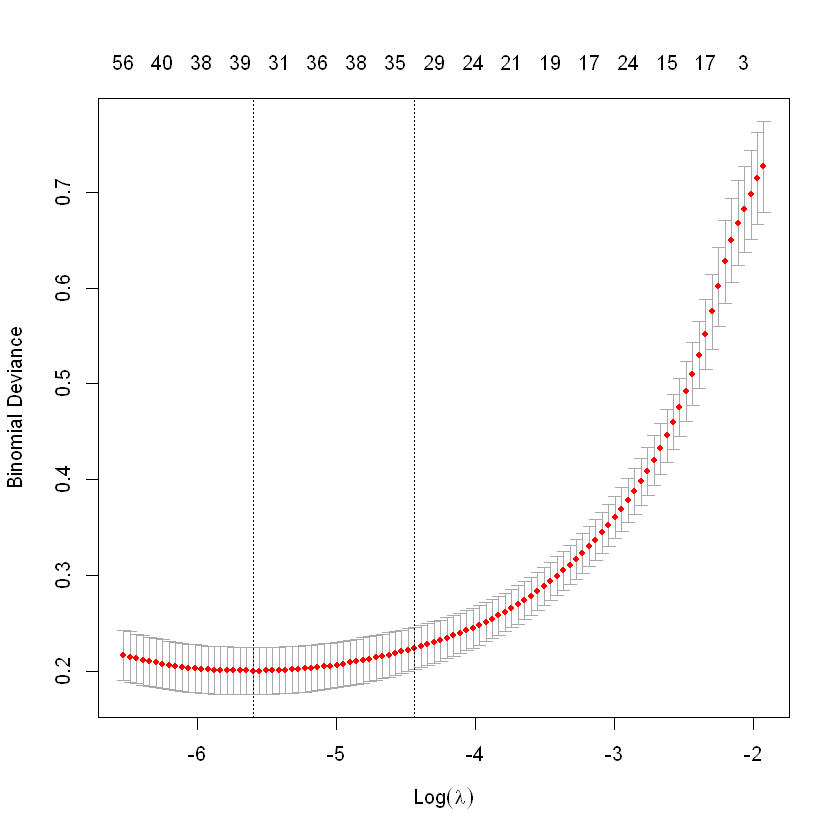

In [56]:
plot(cvlogfit)

The argmin lambda would give about ~ 36 ~ 38 non-zero coffieicents with miminal binomial deviance. The argmin labmda is given below as lambda min.

In [100]:
cvlogfit


Call:  cv.glmnet(x = class_mat_train, y = c_train$Ges_Class, type.measure = "deviance",      nfolds = 10, family = "binomial") 

Measure: Binomial Deviance 

      Lambda Index Measure      SE Nonzero
min 0.003712    80  0.2002 0.02463      37
1se 0.011877    55  0.2238 0.02238      29

#### 2b) Comment on the regression coefficients. Is there any interesting information? Try to interpret the model.

Before, we had 3*315 = 945 features, we reduced them. 
Now we have 37 nonzero coefficients.
Now let's see, in which indexes the non-zero coefficients occur.
Plot one instance from each class as time series, and try to catch where class#3 is distinct the most.
In terms of distance from one the other, we may see the part (in index) where the class#3 is the most distinct from the others.

In [59]:
#show several coefficients for labbda.min
coef(cvlogfit,s="lambda.min")[c(1,15,16,18,327,328,340,632,880,888),1]

(Intercept)       X. 14       X. 15       X. 17       Y. 11       Y. 12 
-5.34675762  0.00000000  0.00000000 -0.08239195  0.00000000 -0.29385056 
      Y. 24        Z. 1      Z. 249      Z. 257 
 0.00000000  0.00000000  0.00000000 -0.12888884

In [60]:
dim(coef(cvlogfit,s="lambda.min"))
#945 features + 1 intercept

[1] 946   1

In [104]:
#Now let's see, in which indexes the non-zero coefficients occur.
howmanyx= sum(ifelse(coef(cvlogfit,s="lambda.min")[2:316,] != 0 , 1,0))
howmanyy= sum(ifelse(coef(cvlogfit,s="lambda.min")[317:631,] != 0 , 1,0))
howmanyz= sum(ifelse(coef(cvlogfit,s="lambda.min")[632:946,] != 0 , 1,0))
howmanyx
howmanyy
howmanyz

[1] 20

[1] 10

[1] 7

20 x features, 10 y features, 7 z features have non-zero coefficients. The others were eliminated ( penalized and got 0 coeff.)

In [105]:
#total non zero coeff + 1 intercept
howmany = howmanyx +howmanyy + howmanyz +1 
howmany


[1] 38

In [63]:
#########plot
#Plot one instance from each class as time series, and try to catch where class#3 is distinct the most.
#In terms of distance from one the other, we may see the part (in index) where 
#the class#3 is the most distinct from the others.

#the acceleration data for classes in x1-x2----y1-y2----z1-z2 format
#get a random instance of ech class
#use Scaled_Train_Data_Conc data
Scaled_Train_Data_Conc[c(1,2,4,7,8,11,20,21),1:2]
#index 1-gesture6
#index 2-gesture5
#index 4-gesture3##
#index 7-gesture7
#index 8-gesture4
#index 11-gesture1
#index 20-gesture2
#index 21-gesture8

,Ges_Class,X. 1
1,6,-0.42019517
2,5,1.78273070
4,3,-0.06635733
7,7,1.60010472
8,4,0.27606638
11,1,-0.97948722
20,2,0.08202627
21,8,-0.64847764


(Intercept)       X. 14       X. 15       X. 17       Y. 11       Y. 12 
-5.34675762  0.00000000  0.00000000 -0.08239195  0.00000000 -0.29385056 
      Y. 24        Z. 1      Z. 249      Z. 257 
 0.00000000  0.00000000  0.00000000 -0.12888884

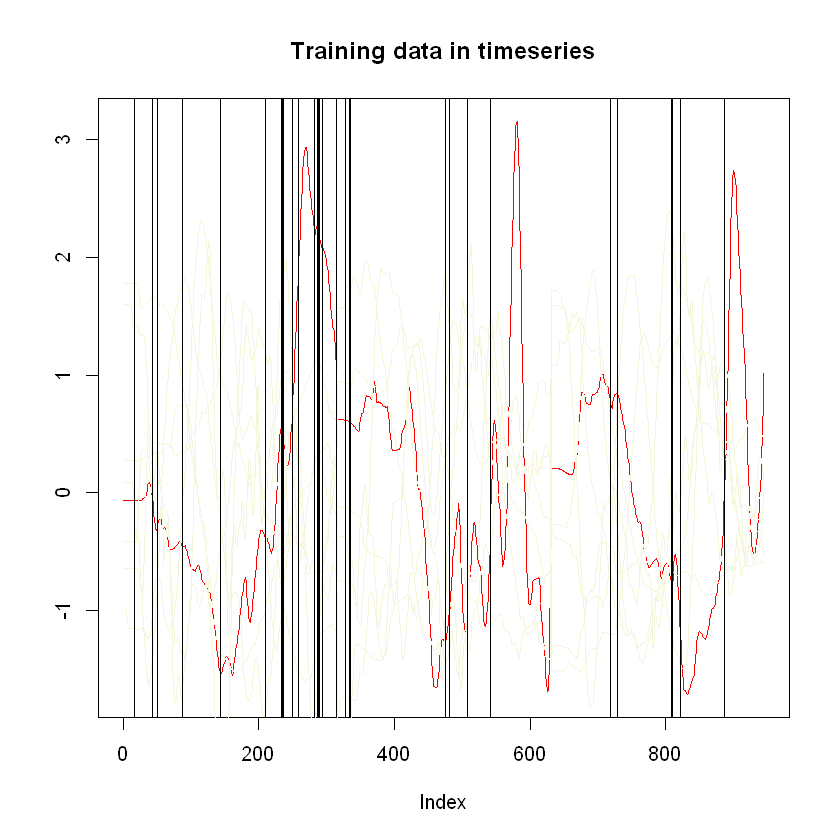

In [69]:
#now plot
#this is class#3
plot( c(1:945),Scaled_Train_Data_Conc[4,-1],type="l", xlab="Index", col="red",ylab="", main ="Training data in timeseries")
#plot the others
for (i in c(1,2,7,8,11,20,21))   
{
  points ( c(1:945),Scaled_Train_Data_Conc[i,-1],type="l", xlab="Index", col="beige") 
 
}

#add a vertical line for which the coeffieicients a nonzero, for instance add a line to x=17 y=12 z= 257 ..
coef(cvlogfit,s="lambda.min")[c(1,15,16,18,327,328,340,632,880,888),1]

no=0
for (i in 2:946) {
if (coef(cvlogfit,s="lambda.min")[i,1] != 0) 
{#print ( coef(cvlogfit,s="lambda.min")[i,1]) #show which
 #print(i)
  no = no+1
  abline ( v  =  i-1 , col = "black")} 
  # minus 1st index intercept,indexofcoord=i-1, where intercept(i=1),x1... x(index)=i-1,...x315, y1,...z1,...z315
}


In [70]:
#index: first 315 for x, next 315 for y, the last 315 for z
# no= number of nonzero coeff (excluding intercept, only for x1,x2,,z314,z315)
no

[1] 37

The number effective features reduced to 37 (+1 intercept).

On the plot, we can see that nonzero coefficents are in between x235-x336 mostly, there is a few nonzero for y and z has even less effective coordinate values.

Xcoordinates have the most affect on the results. This result is in-line with our previous assumption on weighting the distances on each x-y-x coordinate seperately. For instance, here, x should have gotten more weight. It makes sense since class#3 is a straight line lying on the x axis.

On the plot we can compare the behavior of  class#3  to the others. It is quite hard to capture the difference, but, Class#3 behavior seem to differ from the other classes in terms of the xcord values the most, in between ~ x235-x336. 

#### Test on test data

In [111]:
#test on test data
class_mat_test = as.matrix(c_test[,-1])
#on test data
start.time <- Sys.time()

pen_prob_test <-  predict(cvlogfit,class_mat_test,type='response',s='lambda.min')
#pen_prob_test
pen_pred_test <- as.integer(pen_prob_test > ratio)

end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

pen_confusion_mat_test <- addmargins(table(c_test$Ges_Class, pen_pred_test))

pen_confusion_mat_test

Time difference of 0.05702496 secs

,0,1,Sum
0,2897,231,3128
1,42,412,454
Sum,2939,643,3582


The  model predicted 412 of the 454 class#3 correctly.

In [112]:
summary(pen_prob_test)

       1            
 Min.   :0.0000014  
 1st Qu.:0.0004345  
 Median :0.0026884  
 Mean   :0.1162499  
 3rd Qu.:0.0274760  
 Max.   :0.9966285  

In [113]:
#testing error & accuracy
pentesterr =  1- (sum(diag((pen_confusion_mat_test[1:2,1:2]))) /  pen_confusion_mat_test[3,3])
pentesterr 

pen_acc_test= 1- pentesterr
pen_acc_test


[1] 0.07621441

[1] 0.9237856

Accuracy = 92.4 %. It is significantly increased compared to the first model without penalties. 
Overfitting is prevented since not all of the features were employed in the model now, some were penalized. Model complexity is significantly reduced.

### 2c) You are expected to transform your training data to distance information (i.e. Nby N matrix). Note that you need to perform a similar transformation to your test data. In other words, you need to calculate the distance of each test instance to training instance to obtain a distance based representation for your test data. This will be an Ntest by N matrix (Ntest refers to the number of test instances) where each entry (i,j) refers to the distance of test time series i to the training time series j. You can use Euclidean distance as your distance measure. Perform the same training and test strategy as in part b but use the distances as your new feature matrices. Comment on the regression coefficients. What do they imply under this new representation setting?

In [82]:
###distance matrix based approach
#we already have
class_mat_train[1:5,1:5]
class_mat_test [1:5,1:5]
#get the transpose, put each the instances in vector from (without class info)
tr_train = t(class_mat_train)
tr_test = t(class_mat_test)
#sample
tr_train [1:5,1:5]
tr_test [1:5,1:5]

X. 1,X. 2,X. 3,X. 4,X. 5
-0.42019517,-0.42002489,-0.41967767,-0.41931952,-0.41912939
1.78273070,1.78260929,1.78213720,1.78148436,1.78034280
0.67556070,0.67558589,0.67552558,0.67538086,0.67490859
-0.06635733,-0.06623391,-0.06601829,-0.06582253,-0.06584629
1.39465049,1.39458047,1.39425271,1.39377798,1.39287102


X. 1,X. 2,X. 3,X. 4,X. 5
1.7528041,1.7534430,1.7538109,1.7542993,1.7548017
-0.1433734,-0.1438205,-0.1440569,-0.1439606,-0.1436661
1.6949938,1.7187370,1.7306662,1.7542993,1.7663777
1.4521906,1.4526574,1.4529294,1.4533557,1.4538250
1.4521906,1.4526574,1.4529294,1.4533557,1.4538250


X. 1,-0.4201952,1.782731,0.6755607,-0.06635733,1.394650
X. 2,-0.4200249,1.782609,0.6755859,-0.06623391,1.394580
X. 3,-0.4196777,1.782137,0.6755256,-0.06601829,1.394253
X. 4,-0.4193195,1.781484,0.6753809,-0.06582253,1.393778
X. 5,-0.4191294,1.780343,0.6749086,-0.06584629,1.392871


X. 1,1.752804,-0.1433734,1.694994,1.452191,1.452191
X. 2,1.753443,-0.1438205,1.718737,1.452657,1.452657
X. 3,1.753811,-0.1440569,1.730666,1.452929,1.452929
X. 4,1.754299,-0.1439606,1.754299,1.453356,1.453356
X. 5,1.754802,-0.1436661,1.766378,1.453825,1.453825


In [83]:
#check dim
dim(tr_train)
dim(tr_test)

[1] 945 896

[1]  945 3582

tr_train has N=896 instances each has a lenght of 945. 945*896 matrix

tr_testhas Ntest=3582 instances each has a lenght of 945. 945*3582 matrix

In [84]:
#calculate distance between training of each instance training/test and each instance of trainig

dismat_train = matrix( nrow = ncol(tr_train), ncol = ncol(tr_train))
dismat_tt = matrix( nrow = ncol(tr_test), ncol = ncol(tr_train))

In [85]:
#compute on train data. dist: train to train

for (i in 1:ncol(tr_train))
{
for (j in 1:ncol(tr_train))
  {
    
dismat_train [i,j]  = sqrt(sum( (tr_train[,i] -  tr_train[,j])^2 ) )

  } #end j
} #end i


dismat_train [1:5,1:5]

0.00000,51.55262,46.83241,50.69513,41.05373
51.55262,0.00000,26.51161,37.89787,34.45132
46.83241,26.51161,0.00000,44.05189,37.55521
50.69513,37.89787,44.05189,0.00000,46.61585
41.05373,34.45132,37.55521,46.61585,0.00000


In [86]:
#distance between 1st instance and 4th is 50.69
dim(dismat_train)
#it is 896*896 N*N

[1] 896 896

In [88]:
#calculate distance between  each instance of test and each instance of training 

for (i in 1:ncol(tr_test))
{
  for (j in 1:ncol(tr_train))
  {
    
    dismat_tt [i,j]  = sqrt(sum( (tr_train[,j] -  tr_test[,i])^2 ) )
    
  } #end j
} #end 

#sample train & test distance matrix
dismat_tt [1:5,1:5]



51.95028,14.07490,28.94035,41.30975,35.94806
35.19561,55.46713,55.68959,47.95484,46.19773
42.20911,25.98261,36.41021,43.44508,29.70895
42.99393,35.47328,44.19846,46.06910,26.01566
50.10720,15.31215,16.65211,43.26090,35.28094


In [89]:
#distance between 1st test instance and 4th training instance is 41.30
dim(dismat_tt)
#it is 3582*896 Ntest*N

[1] 3582  896

In [90]:
#use this distance info to build a model 
#use training distance matrix to build model with 10 folds

cvfitds=cv.glmnet(dismat_train,c_train$Ges_Class,family='binomial',nfolds=10, type.measure = "deviance")
cvfitds


Call:  cv.glmnet(x = dismat_train, y = c_train$Ges_Class, type.measure = "deviance",      nfolds = 10, family = "binomial") 

Measure: Binomial Deviance 

      Lambda Index Measure      SE Nonzero
min 0.002228    51  0.1213 0.02970      36
1se 0.004273    44  0.1457 0.02979      24

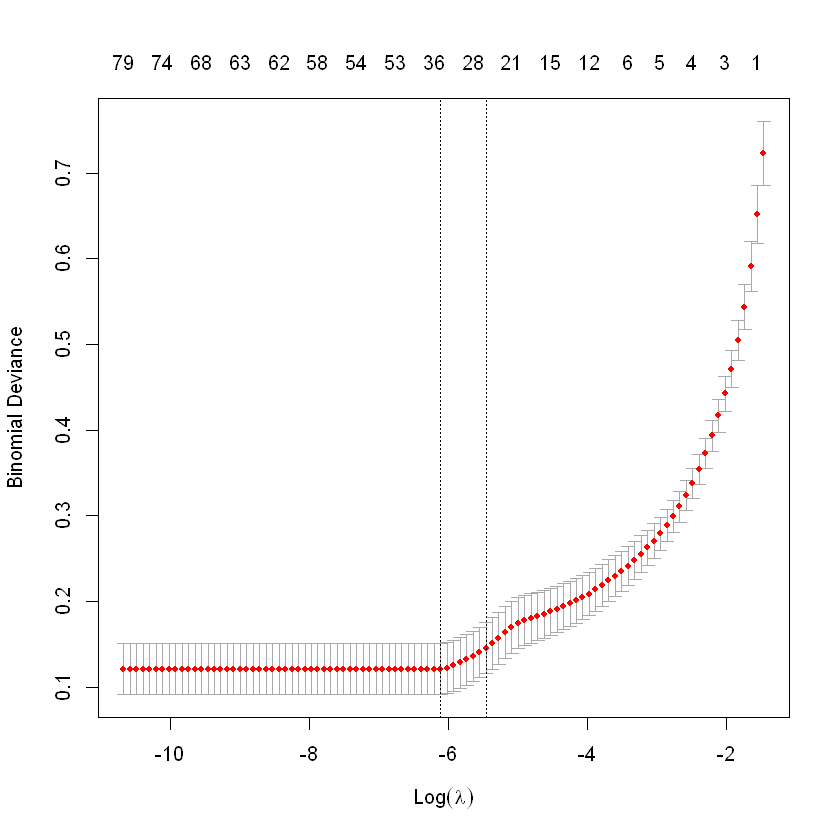

In [91]:
plot(cvfitds)

The minimizer lambda would give about ~ 36 non-zero cofficeints with miminal binomial deviance. The minimizer lambda is given below as lambda min.

In [93]:
cvfitds


Call:  cv.glmnet(x = dismat_train, y = c_train$Ges_Class, type.measure = "deviance",      nfolds = 10, family = "binomial") 

Measure: Binomial Deviance 

      Lambda Index Measure      SE Nonzero
min 0.002228    51  0.1213 0.02970      36
1se 0.004273    44  0.1457 0.02979      24

In [94]:
#show sample coefficients
coef(cvfitds,s="lambda.min")[c(1,5,6,113,190,200),1]

(Intercept)          V4          V5        V112        V189        V199 
44.44594701 -0.05357077  0.00000000 -0.07312239 -0.08103980  0.00000000

In [106]:
dim(coef(cvfitds,s="lambda.min"))
howmanyds= sum(ifelse(coef(cvfitds,s="lambda.min") != 0 , 1,0))

#total non zero coeff + 1 intercept

howmanyds

[1] 897   1

[1] 37

37 (36 feature +1 intercept) coefficients are non-zero as shown on the results of "cvfitds" as well.

#### Predict on test data

In [114]:
# predict on test
start.time <- Sys.time()

ds_prob <-  predict(cvfitds,dismat_tt,type='response', s="lambda.min")
ds_pred <- as.integer(ds_prob > ratio)

end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken

ds_confusion_mat <- addmargins(table(c_test$Ges_Class, ds_pred ))

ds_confusion_mat


Time difference of 0.1050341 secs

,0,1,Sum
0,3006,122,3128
1,23,431,454
Sum,3029,553,3582


In [108]:
#testing accuracy
dserr =  1- (sum(diag((ds_confusion_mat[1:2,1:2]))) /  ds_confusion_mat[3,3])
dserr

dsacc= 1- dserr
dsacc

[1] 0.04048018

[1] 0.9595198

Almost 96 % accuracy is establihed. The accuracy is even better now, compared to the last two models. Inroduction of the nonlinear relationship information via Euclidean distances increased the accuracy.

### 2c)Comment on the regression coefficients. What do they imply under this new representation setting?

The distances were treated as a feature matrix.Each feature held distance information, some sort of similarility of the time series.

The model was build on the distance info between training instance i and training instance j. This was used as a similarity measure in order to capture the classification. The model provided regression coefficient for these new distance based features. 

It captured the time series relationship between ith and jth instance, based on how similar(~distant) they were. 

Then the model was used to predict the test instance's classes. It classified the instances in a way that it checked if the distance between test instance i and training instance j was "similar" to  the distance between the time series of the training data i and the time series of the training data j. This distance information established a classification model in the form of a logistic regression model.

### 2d) Provide an overall comparison on the results you obtain for each part (over all tasks). You can compare test accuracy of each alternative method you developed.

#### Task1
KNN was used to classify instances which is a non-parametric model.
There is not much difference in terms of accuracy between the utilized distances.  

#### Manhattan distance
When the distance between instances (time series) was set to Manhattan, the k value is selected as 3.  Over 95 % accuracy is noted. The prediction took 26.51121 secs.
#### Euclidean distance
When distance was set to Euclidean, the k value is selected as 2.
Almost 95 % acurracy is noted.
We got a little bit higher accuracy with the model "manhattan, K =3"  than the other "Euclidean K =2".
It took about 4 seconds to obtain the prediction results.

#### Task2
#### Logistic regression without penalties: 
Number of parameters were larger then the number of data points, which is not desirable. 
Training accuracy: 100 %.
Accuracy on test data: 50 %.
It overfits to the training data.
Too many coefficients are utilized whereas the class#3 is a simple line of x-axis, we would expect the some of the info on the y-z axis to be not effective. Also, it was not a good choice to employ classic logistic regression when we have a data set with less number of instances than features. Some of the features could not be employed while estimating the model, therefore the results may be misleading. In 0.13376 seconds the prediction results were computed. When glmnet was used with lambda= 0 (penalty = 0), then  92% accuracy was noted. 56 features (with nonzero coefficients) + 1 intercept were employed.  It took 0.3740809 seconds.

#### Lasso Regression, penalization is used:
Before, we had 3*315 = 945 features, we reduced the number of non-zero coefficients with this approach.
Now, we have 37 nonzero coefficients +1 intercept.This makes the model less complex and more interpretable.
Most information comes from the x-coordinate indexes, which is reasonable consireing the shape of class#3. Many  of the features (coordinate information of the time series) were penalized and got 0 coefficients.
Accuracy, in this case, is 92.4 %. It is significantly  increased compared to the first model without penalties.
Overfitting is prevented since not all of the features were employed in the model now, some features were penalized and got 0 coefficients. Therefore, the model became less complex (which reduced the risk of overfitting) and it is easier to interpret.
In 0.05702496 seconds the prediction results were computed, which is very fast, especially compared to knn.

#### Using distance matrices as feature matrices:
This model was created using the information about the distance between training instances i and j. Then, the distance between test instance i and training instance j was checked for "similarity" to establish a classification model in the form of a logistic regression model. For these new distance-based characteristics which could handle nonlinear relations, regression coefficients were extablished. Model had only 36+1 nonzero coefficient which is far less complicated than the first model in part a. Almost 96 % accuracy is establihed which is the best one we got. 
It took 0.1050341 seconds to obtain the prediction results.

#### KNN is slow to predict. It has to keep track of all training data and find the neighbors in terms of distances which is a computational burden, whereas logistic regression can easily predict once the coefficients are tuned.
#### KNN handled nonlinearity better by nature compared to the logistic regression model. Knn had higher accuracy without any extra modification. 
#### Logistic regression can be tuned to perform better with the introduction of penalties and the use of distance information which could keep nonlinear relations. The accuracy can be increased via these approaches.